In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [26]:
# Ensure plots folder exists
os.makedirs("plots", exist_ok=True)

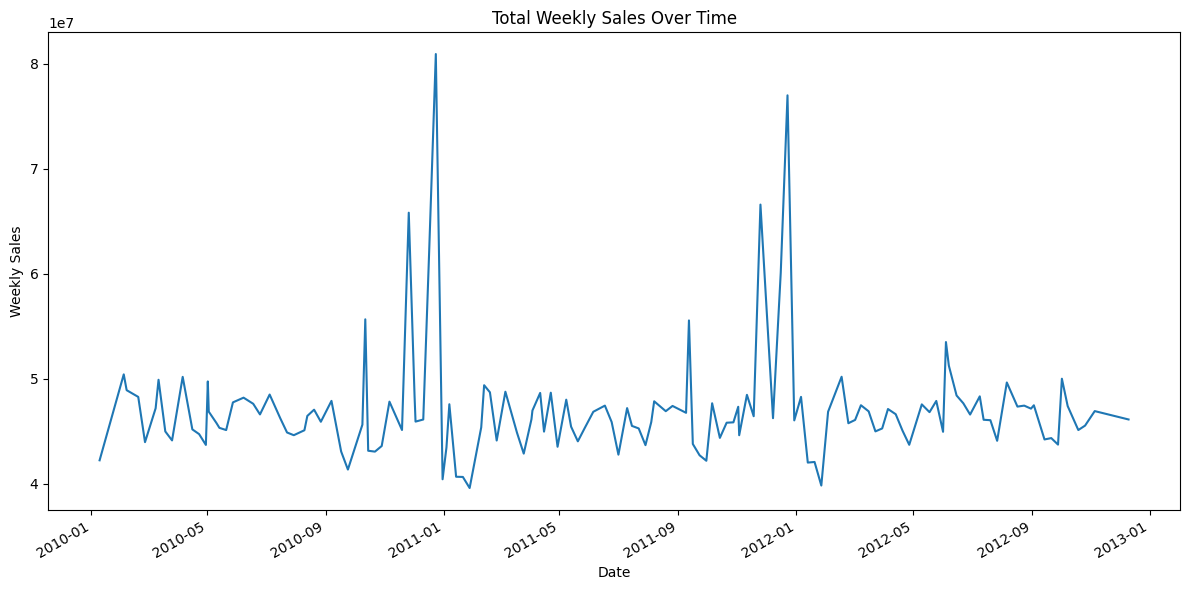

In [44]:
# 1. SALES TRENDS OVER TIME
# -----------------------------
plt.figure(figsize=(12, 6))
sales_by_date = df.groupby("Date")["Weekly_Sales"].sum()
sales_by_date.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.savefig("plots/01_sales_over_time.png")
plt.show()
plt.close()

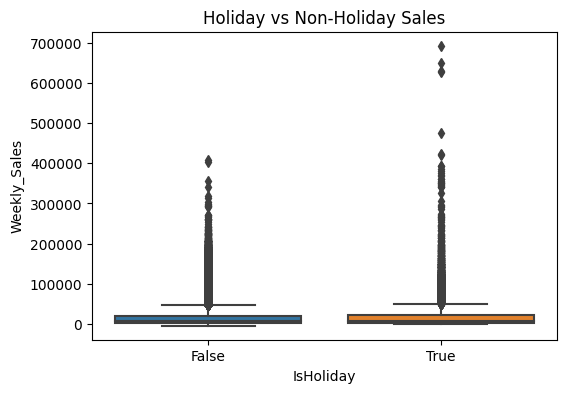

In [45]:
# 2. HOLIDAY vs NON-HOLIDAY SALES
# -----------------------------
plt.figure(figsize=(6, 4))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.savefig("plots/02_holiday_vs_nonholiday.png")
plt.show()
plt.close()

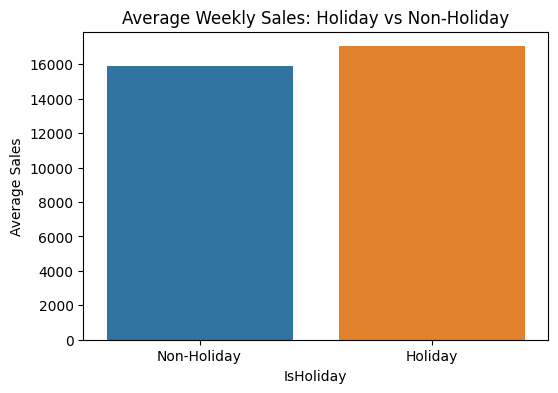

In [46]:
# Impact of Holidays
# ------------------------------
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.show()

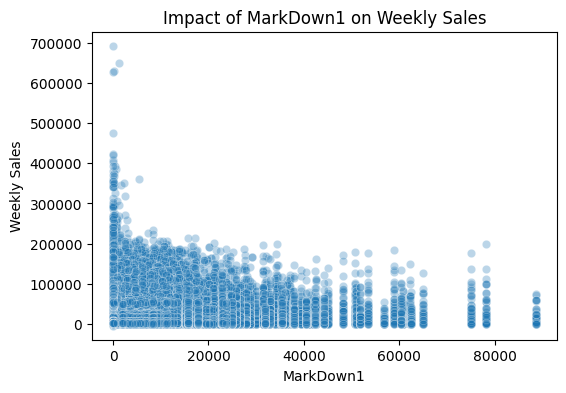

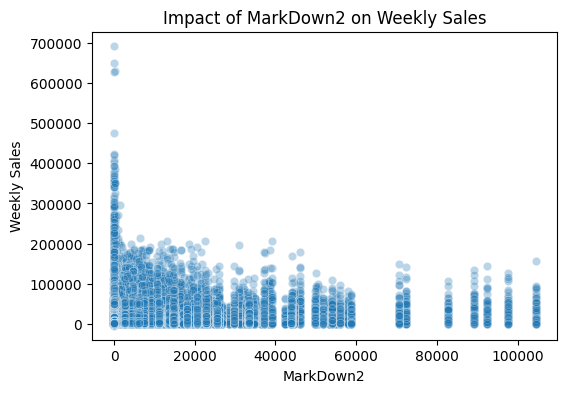

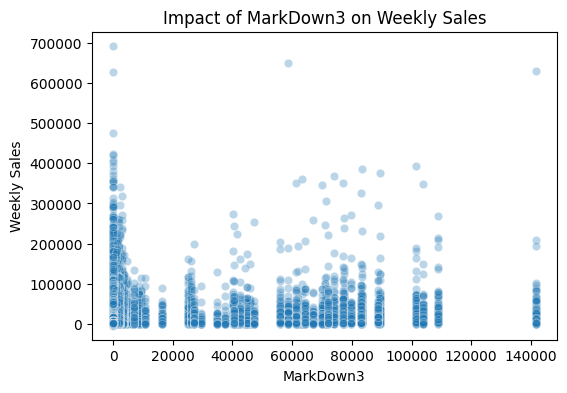

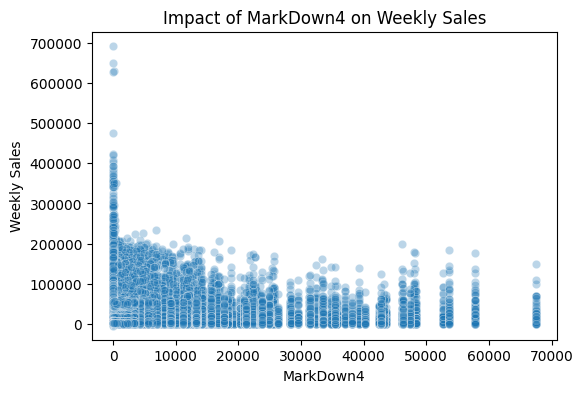

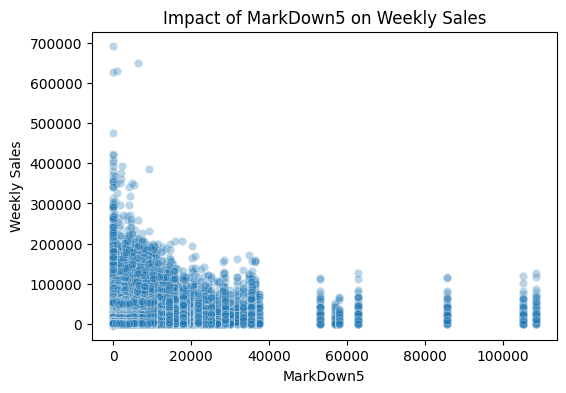

In [47]:
# --- 3. MARKDOWN IMPACT ANALYSIS ---
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y="Weekly_Sales", alpha=0.3)
    plt.title(f"Impact of {col} on Weekly Sales")
    plt.xlabel(col)
    plt.ylabel("Weekly Sales")
    plt.savefig(f"plots/03_{col}_impact.png")
    plt.show()
    plt.close()

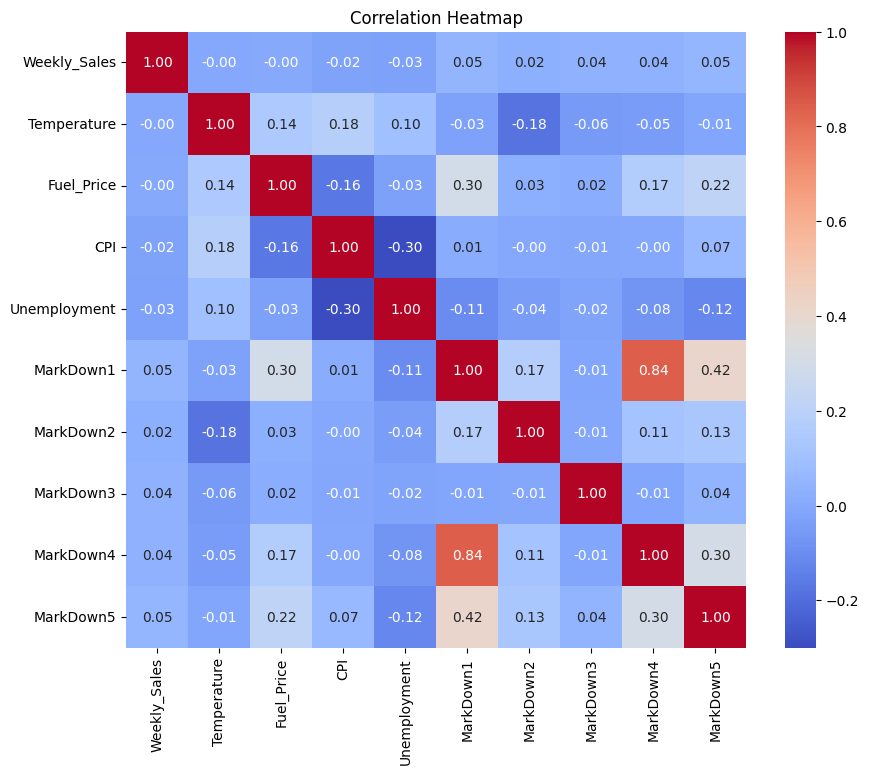

In [48]:
# --- 4. CORRELATION HEATMAP ---
corr_features = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"] + markdown_cols
corr = df[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/04_correlation_heatmap.png")
plt.show()
plt.close()

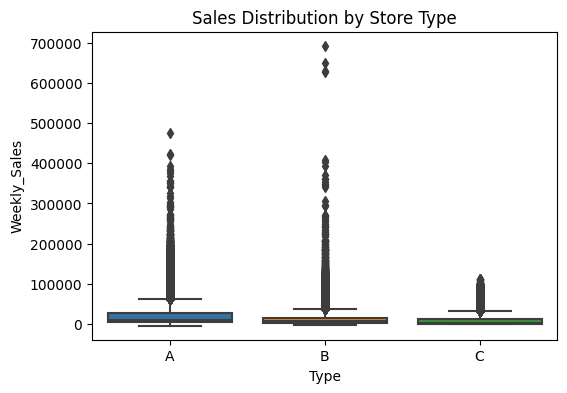

In [49]:
# --- 5. SALES BY STORE TYPE ---
plt.figure(figsize=(6, 4))
sns.boxplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Sales Distribution by Store Type")
plt.savefig("plots/05_sales_by_store_type.png")
plt.show()
plt.close()

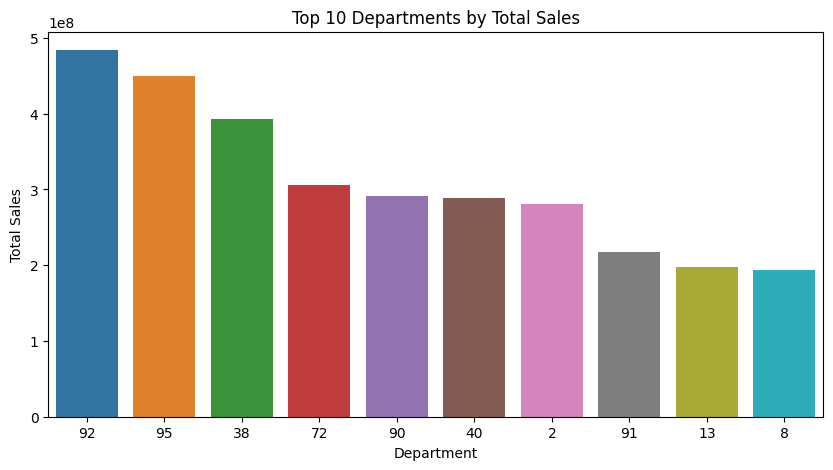

In [51]:
# Sales by Store and Department (Top 10)
# ------------------------------
top_depts = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_depts.index.astype(str), y=top_depts.values)
plt.title("Top 10 Departments by Total Sales")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

In [36]:
# Impact During Holiday vs Non-Holiday Weeks

# Separate data
holiday_df = df[df["IsHoliday"] == True]
nonholiday_df = df[df["IsHoliday"] == False]

# Summary statistics
print("📘 Mean Weekly Sales During Holiday Weeks:", holiday_df["Weekly_Sales"].mean())
print("📕 Mean Weekly Sales During Non-Holiday Weeks:", nonholiday_df["Weekly_Sales"].mean())

📘 Mean Weekly Sales During Holiday Weeks: 17035.823187350394
📕 Mean Weekly Sales During Non-Holiday Weeks: 15901.445069008367


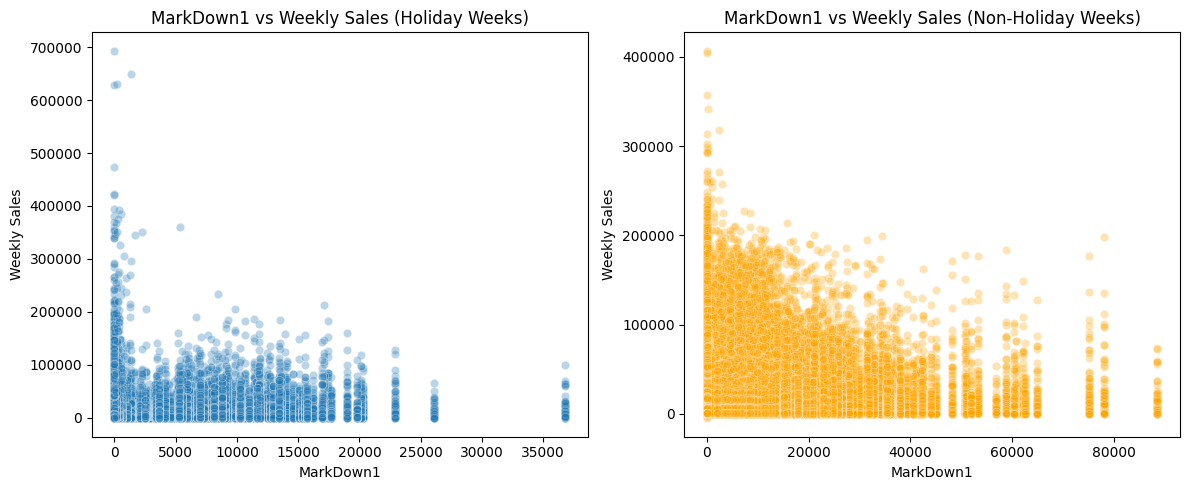

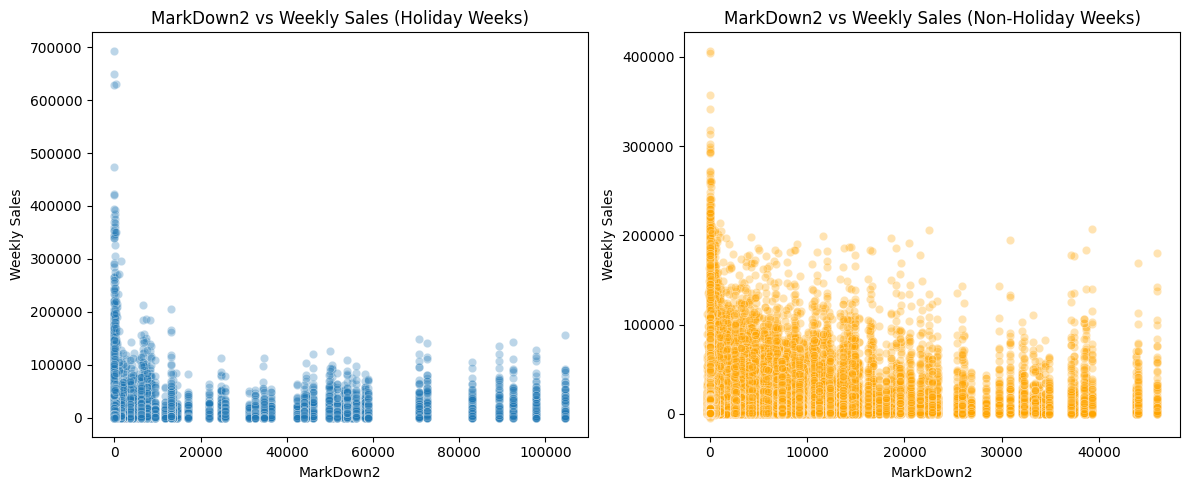

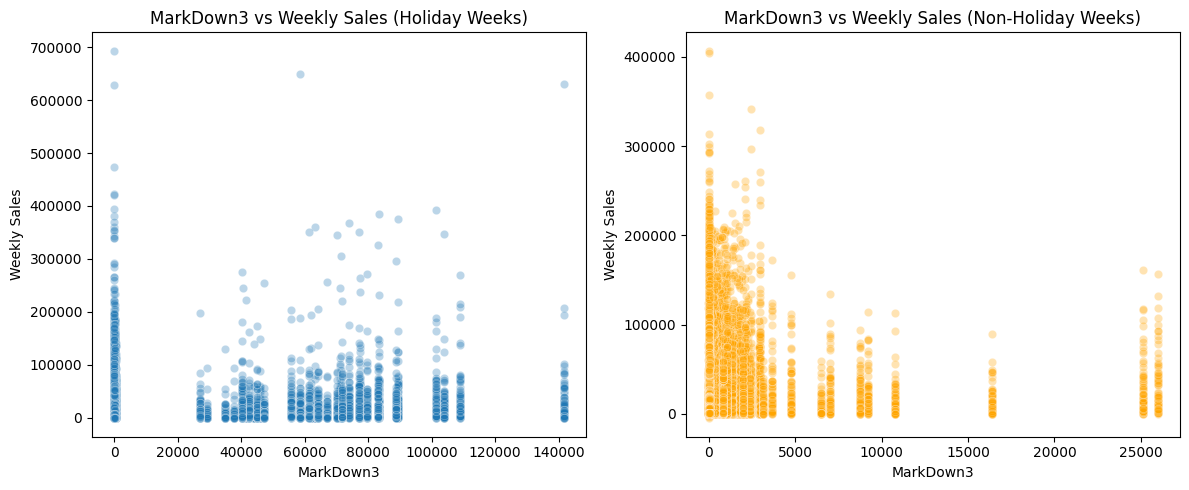

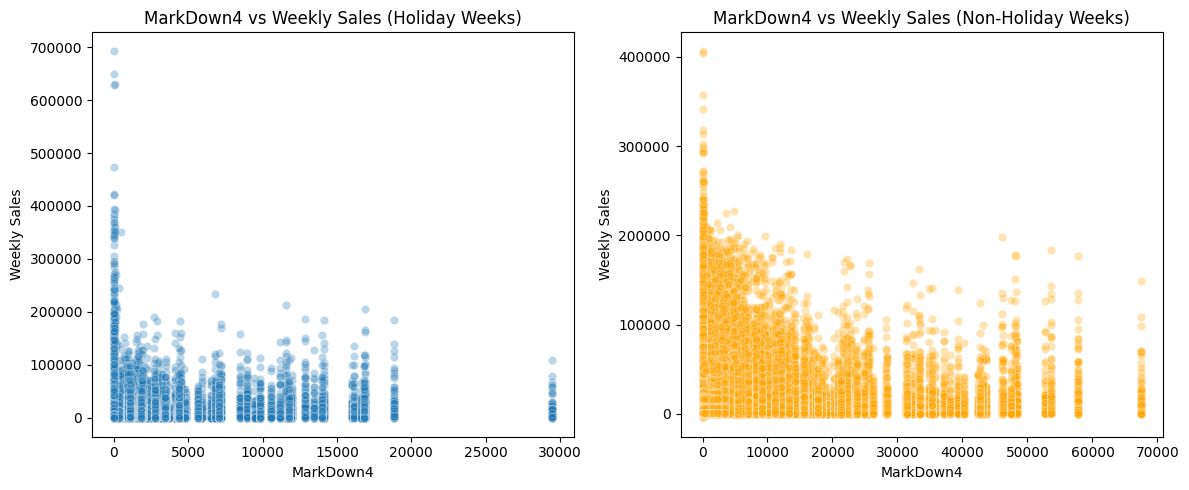

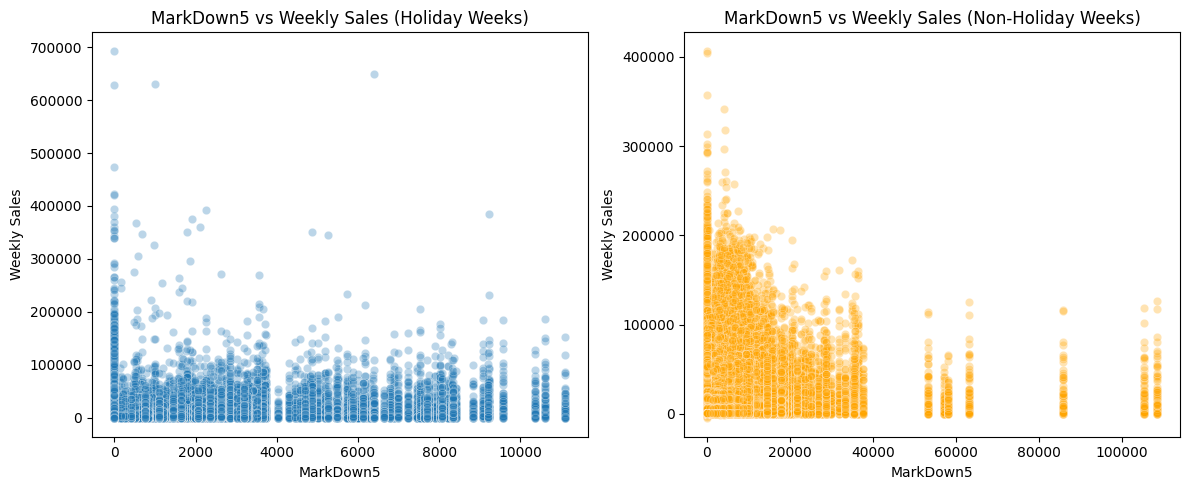

In [37]:
# --- 7. MARKDOWN IMPACT DURING HOLIDAYS ---
holiday_df = df[df["IsHoliday"] == True]
nonholiday_df = df[df["IsHoliday"] == False]

for col in markdown_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=holiday_df, x=col, y="Weekly_Sales", alpha=0.3)
    plt.title(f"{col} vs Weekly Sales (Holiday Weeks)")
    plt.xlabel(col)
    plt.ylabel("Weekly Sales")

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=nonholiday_df, x=col, y="Weekly_Sales", alpha=0.3, color="orange")
    plt.title(f"{col} vs Weekly Sales (Non-Holiday Weeks)")
    plt.xlabel(col)
    plt.ylabel("Weekly Sales")

    plt.tight_layout()
    plt.show()

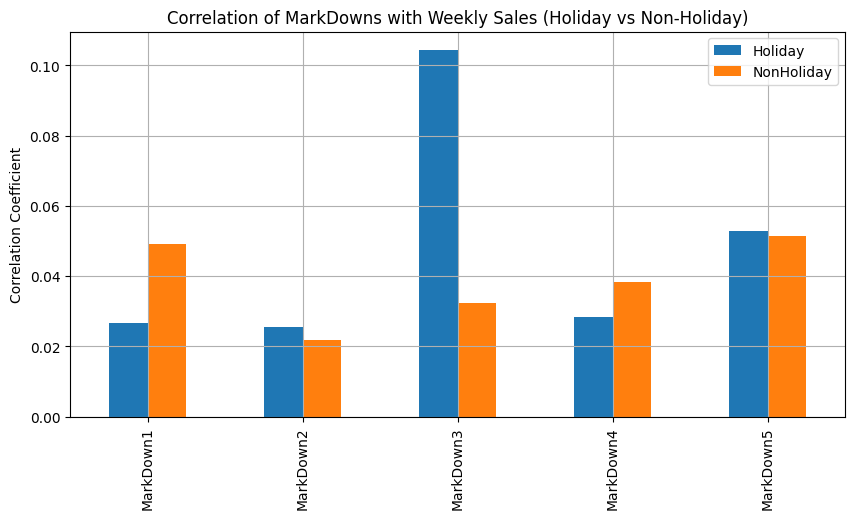

In [38]:
# --- 8. CORRELATION COMPARISON: HOLIDAY VS NON-HOLIDAY ---
holiday_corr = holiday_df[["Weekly_Sales"] + markdown_cols].corr()["Weekly_Sales"][1:]
nonholiday_corr = nonholiday_df[["Weekly_Sales"] + markdown_cols].corr()["Weekly_Sales"][1:]

comparison_df = pd.DataFrame({
    "Holiday": holiday_corr,
    "NonHoliday": nonholiday_corr
})

comparison_df.plot(kind="bar", figsize=(10, 5))
plt.title("Correlation of MarkDowns with Weekly Sales (Holiday vs Non-Holiday)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

In [39]:
# --- 9. MODEL EVALUATION METRICS (IF Y_TRUE & Y_PRED AVAILABLE) ---
# Sample: Dummy prediction values for demonstration
y_true = df["Weekly_Sales"].sample(1000, random_state=1).values
y_pred = y_true + np.random.normal(0, 5000, size=len(y_true))

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("\n--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

print("\n\u2705 EDA, Markdown Insights, and Evaluation Metrics Complete.")


--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 4,237.32
Mean Squared Error (MSE): 27,754,293.38
Root Mean Squared Error (RMSE): 5,268.23
R-squared (R²): 0.9556

✅ EDA, Markdown Insights, and Evaluation Metrics Complete.
